<h1><center> MRP - Project</center></h1>
<h1><center> Design, Development and Evaluation of Domain-Specific Topic Models and Classifiers for Public Health Using Big Social Data</center></h1>

<h1><center> Kumara Prasanna Jayaraju</center></h1>

In [12]:
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:75% !important; }</style>"))
display(HTML("<style>.output_result { max-width:100% !important; }</style>"))
display(HTML("<style>.prompt { display:none !important; }</style>"))

### Collection for Data

In [2]:
#!pip install praw
import praw
import pandas as pd
from datetime import datetime

# Acessing the reddit api
reddit = praw.Reddit(client_id = 'xyz',
                     client_secret = 'xyz',
                     user_agent = 'MRP_Learning',
                     username = 'Kumara-stu',
                     password = 'xyz')     # your reddit password


Version 7.2.0 of praw is outdated. Version 7.4.0 was released Friday July 30, 2021.


In [4]:
print("My username on Reddit:", reddit.user.me())

My username on Reddit: Kumara-stu


### Collecting the data from subreddits via Reddit API

In [6]:
# make a list of subreddits you want to scrape the data from
sub = ['worldnews','vaxxhappened','VACCINES', 'VaccineDiscussion', 'Vaccine',
      'vaccinationpics', 'VaccinatedLansing', 'TrueAntiVaccination',
      'toronto', 'reddit.com', 'Quebec', 'pregnant',
      'ontario', 'medicine', 'Health', 'epidemic',
      'DebateVaccine', 'CovidVaccine', 'CovidVaccinatedUncut',
      'covidlonghaulers', 'CovIdiots', 'COVID19positive',
      'COVID19_support', 'coronavirusme',
      'CoronavirusCanada', 'conspiracy', 'CanadaCoronavirus',
      'Canada']  

# Chosing the subreddit
print("List of Subreddits:")
for s in sub:
    print("Subreddit:", s)
    subreddit = reddit.subreddit(s)   
    
    
#Creating dictionary to store the data which will be converted to a dataframe

# Scraping is done using a search with following keyword
    query = ['COVID','COVID-19', 'Corona','Corona virus', 'corona','corona virus','Coronavirus',
             'Covaxin','covishield', 'UK Variant', 'indian Variant', 'vaccines', 'Pfizer', 
             'Moderna vaccine', 'AstraZeneca', 'BioNTech vaccine', 'Johnson & Johnson']

    for item in query:
        post_dict = {
            "title" : [],
            "score" : [],
            "id" : [],
            "url" : [],
            "comms_num": [],
            "created" : [],
            "body" : [],
            "author": [],
            "upvote_ratio":[],
            "permalink":[],
            "subreddit_id":[],
            
        }
        for submission in subreddit.search(item,sort = "top",limit = 10000):
            post_dict["title"].append(submission.title)
            post_dict["score"].append(submission.score)
            post_dict["id"].append(submission.id)
            post_dict["url"].append(submission.url)
            post_dict["comms_num"].append(submission.num_comments)
            post_dict["created"].append(datetime.fromtimestamp(submission.created))
            post_dict["body"].append(submission.selftext)
            post_dict["author"].append(submission.author)
            post_dict["upvote_ratio"].append(submission.upvote_ratio)
            post_dict["permalink"].append(submission.permalink)
            post_dict["subreddit_id"].append(submission.subreddit_id)

            post_data = pd.DataFrame(post_dict)
            post_data.to_csv(s+"_"+ item +"df_subreddit_MRP.csv")
        #print(post_data)

Subreddit: worldnews
Subreddit: vaxxhappened
Subreddit: VACCINES
Subreddit: VaccineDiscussion
Subreddit: Vaccine
Subreddit: vaccinationpics
Subreddit: VaccinatedLansing
Subreddit: TrueAntiVaccination
Subreddit: toronto
Subreddit: reddit.com
Subreddit: Quebec
Subreddit: pregnant
Subreddit: ontario
Subreddit: medicine
Subreddit: Health
Subreddit: epidemic
Subreddit: DebateVaccine
Subreddit: CovidVaccine
Subreddit: CovidVaccinatedUncut
Subreddit: covidlonghaulers
Subreddit: CovIdiots
Subreddit: COVID19positive
Subreddit: COVID19_support
Subreddit: coronavirusme
Subreddit: CoronavirusCanada
Subreddit: conpiracy
Subreddit: CanadaCoronavirus
Subreddit: Canada


### Combining the data from all the subreddits

In [4]:
import os
import pandas as pd
cwd = os.path.abspath('/Users/kumaraprasannajayaraju/MRP_DataSet/Prazzy/Raw_Files/')
files = os.listdir(cwd)

In [5]:
cwd

'/Users/kumaraprasannajayaraju/MRP_DataSet/Prazzy/Raw_Files'

In [6]:
df = pd.DataFrame()
for file in files:
    df = df.append(pd.read_csv(cwd+'/'+file, index_col=0), ignore_index = False)

In [7]:
df.head()

,title,score,id,url,comms_num,created,body,author,upvote_ratio,permalink,subreddit_id
0,UK nearing it's highest ever COVID-19 infectio...,459,oogbz7,https://www.reddit.com/r/medicine/comments/oog...,175,2021-07-20 21:55:47,"It feels like the sub is done with COVID-19, a...",MEANINGLESS_NUMBERS,0.96,/r/medicine/comments/oogbz7/uk_nearing_its_hig...,t5_2qhff
1,New Covid-19 strain in UK,106,kgzi9m,https://www.reddit.com/r/medicine/comments/kgz...,30,2020-12-20 13:41:32,https://www.cnn.com/2020/12/20/uk/uk-coronavir...,greatkaney,0.96,/r/medicine/comments/kgzi9m/new_covid19_strain...,t5_2qhff
2,Delta Variant,35,ob80cz,https://www.reddit.com/r/medicine/comments/ob8...,18,2021-06-30 18:18:52,Why do we think that the delta variant is mor...,gameringman,0.88,/r/medicine/comments/ob80cz/delta_variant/,t5_2qhff
3,Megathread #58: SARS-CoV-2/COVID-19. Month of ...,32,lbaesm,https://www.reddit.com/r/medicine/comments/lba...,185,2021-02-02 18:59:58,COVID-19 Megathread #58\n\nThis is a megathrea...,PokeTheVeil,0.93,/r/medicine/comments/lbaesm/megathread_58_sars...,t5_2qhff
4,You've had both your Moderna/Pfizer Covid vacc...,9,lh3gzk,https://www.reddit.com/r/medicine/comments/lh3...,25,2021-02-10 15:49:05,"I think the title says it all but here it is, ...",amothep8282,0.61,/r/medicine/comments/lh3gzk/youve_had_both_you...,t5_2qhff


In [8]:
df.shape

(30694, 11)

In [9]:
df.reset_index(drop=True, inplace=True)

### Exploratory Data Analysis

In [10]:
df.isnull().sum()

title               0
score               0
id                  0
url                 0
comms_num           0
created             0
body            16605
author              0
upvote_ratio        0
permalink           0
subreddit_id        0
dtype: int64

In [11]:
df = df.drop(df[df['body'].isnull()].index.tolist())

In [12]:
df.head()

,title,score,id,url,comms_num,created,body,author,upvote_ratio,permalink,subreddit_id
0,UK nearing it's highest ever COVID-19 infectio...,459,oogbz7,https://www.reddit.com/r/medicine/comments/oog...,175,2021-07-20 21:55:47,"It feels like the sub is done with COVID-19, a...",MEANINGLESS_NUMBERS,0.96,/r/medicine/comments/oogbz7/uk_nearing_its_hig...,t5_2qhff
1,New Covid-19 strain in UK,106,kgzi9m,https://www.reddit.com/r/medicine/comments/kgz...,30,2020-12-20 13:41:32,https://www.cnn.com/2020/12/20/uk/uk-coronavir...,greatkaney,0.96,/r/medicine/comments/kgzi9m/new_covid19_strain...,t5_2qhff
2,Delta Variant,35,ob80cz,https://www.reddit.com/r/medicine/comments/ob8...,18,2021-06-30 18:18:52,Why do we think that the delta variant is mor...,gameringman,0.88,/r/medicine/comments/ob80cz/delta_variant/,t5_2qhff
3,Megathread #58: SARS-CoV-2/COVID-19. Month of ...,32,lbaesm,https://www.reddit.com/r/medicine/comments/lba...,185,2021-02-02 18:59:58,COVID-19 Megathread #58\n\nThis is a megathrea...,PokeTheVeil,0.93,/r/medicine/comments/lbaesm/megathread_58_sars...,t5_2qhff
4,You've had both your Moderna/Pfizer Covid vacc...,9,lh3gzk,https://www.reddit.com/r/medicine/comments/lh3...,25,2021-02-10 15:49:05,"I think the title says it all but here it is, ...",amothep8282,0.61,/r/medicine/comments/lh3gzk/youve_had_both_you...,t5_2qhff


In [13]:
df.isnull().sum()

title           0
score           0
id              0
url             0
comms_num       0
created         0
body            0
author          0
upvote_ratio    0
permalink       0
subreddit_id    0
dtype: int64

In [14]:
df.count()

title           14089
score           14089
id              14089
url             14089
comms_num       14089
created         14089
body            14089
author          14089
upvote_ratio    14089
permalink       14089
subreddit_id    14089
dtype: int64

In [15]:
df.head()

,title,score,id,url,comms_num,created,body,author,upvote_ratio,permalink,subreddit_id
0,UK nearing it's highest ever COVID-19 infectio...,459,oogbz7,https://www.reddit.com/r/medicine/comments/oog...,175,2021-07-20 21:55:47,"It feels like the sub is done with COVID-19, a...",MEANINGLESS_NUMBERS,0.96,/r/medicine/comments/oogbz7/uk_nearing_its_hig...,t5_2qhff
1,New Covid-19 strain in UK,106,kgzi9m,https://www.reddit.com/r/medicine/comments/kgz...,30,2020-12-20 13:41:32,https://www.cnn.com/2020/12/20/uk/uk-coronavir...,greatkaney,0.96,/r/medicine/comments/kgzi9m/new_covid19_strain...,t5_2qhff
2,Delta Variant,35,ob80cz,https://www.reddit.com/r/medicine/comments/ob8...,18,2021-06-30 18:18:52,Why do we think that the delta variant is mor...,gameringman,0.88,/r/medicine/comments/ob80cz/delta_variant/,t5_2qhff
3,Megathread #58: SARS-CoV-2/COVID-19. Month of ...,32,lbaesm,https://www.reddit.com/r/medicine/comments/lba...,185,2021-02-02 18:59:58,COVID-19 Megathread #58\n\nThis is a megathrea...,PokeTheVeil,0.93,/r/medicine/comments/lbaesm/megathread_58_sars...,t5_2qhff
4,You've had both your Moderna/Pfizer Covid vacc...,9,lh3gzk,https://www.reddit.com/r/medicine/comments/lh3...,25,2021-02-10 15:49:05,"I think the title says it all but here it is, ...",amothep8282,0.61,/r/medicine/comments/lh3gzk/youve_had_both_you...,t5_2qhff


### Feature Engineering

In [16]:
## working on created(Date and Time) column.

In [17]:
weekDays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

In [18]:
df['Month'] = pd.DatetimeIndex(df['created']).month
df['DayOfWeek'] = pd.DatetimeIndex(df['created']).dayofweek
df['HourofDay'] = pd.DatetimeIndex(df['created']).hour
df['Day'] = pd.DatetimeIndex(df['created']).day
df['Year'] = pd.DatetimeIndex(df['created']).year

In [19]:

#Adding Columns ['coder1_label', 'description1', 'coder2_label', 'description2', 'consensus', 'reaction'] for Analysis
df = df.assign(coder1_label='', description1= '', coder2_label='', description2 = '',
               consensus='', reaction='')


In [20]:
df.columns

Index(['title', 'score', 'id', 'url', 'comms_num', 'created', 'body', 'author',
       'upvote_ratio', 'permalink', 'subreddit_id', 'Month', 'DayOfWeek',
       'HourofDay', 'Day', 'Year', 'coder1_label', 'description1',
       'coder2_label', 'description2', 'consensus', 'reaction'],
      dtype='object')

In [21]:
##Re-Arranging columns

df= df[['created', 'Day', 'Month', 'Year','HourofDay','DayOfWeek',
       'body', 'coder1_label', 'description1', 'coder2_label',
       'description2', 'consensus', 'reaction','score', 'id', 'url', 'comms_num', 'author',
       'upvote_ratio', 'permalink', 'subreddit_id']]

### Data export and Import

In [22]:
### Exporting Clean Data set
    #df.to_csv("Clean_dataset.csv", index = False)

In [23]:
### Importing Clean Data set
    #df1 = pd.read_csv("Clean_dataset.csv")

### Exploration of the cleaned dataset

In [24]:
df.head()

,created,Day,Month,Year,HourofDay,DayOfWeek,body,coder1_label,description1,coder2_label,...,consensus,reaction,score,id,url,comms_num,author,upvote_ratio,permalink,subreddit_id
0,2021-07-20 21:55:47,20,7,2021,21,1,"It feels like the sub is done with COVID-19, a...",,,,...,,,459,oogbz7,https://www.reddit.com/r/medicine/comments/oog...,175,MEANINGLESS_NUMBERS,0.96,/r/medicine/comments/oogbz7/uk_nearing_its_hig...,t5_2qhff
1,2020-12-20 13:41:32,20,12,2020,13,6,https://www.cnn.com/2020/12/20/uk/uk-coronavir...,,,,...,,,106,kgzi9m,https://www.reddit.com/r/medicine/comments/kgz...,30,greatkaney,0.96,/r/medicine/comments/kgzi9m/new_covid19_strain...,t5_2qhff
2,2021-06-30 18:18:52,30,6,2021,18,2,Why do we think that the delta variant is mor...,,,,...,,,35,ob80cz,https://www.reddit.com/r/medicine/comments/ob8...,18,gameringman,0.88,/r/medicine/comments/ob80cz/delta_variant/,t5_2qhff
3,2021-02-02 18:59:58,2,2,2021,18,1,COVID-19 Megathread #58\n\nThis is a megathrea...,,,,...,,,32,lbaesm,https://www.reddit.com/r/medicine/comments/lba...,185,PokeTheVeil,0.93,/r/medicine/comments/lbaesm/megathread_58_sars...,t5_2qhff
4,2021-02-10 15:49:05,10,2,2021,15,2,"I think the title says it all but here it is, ...",,,,...,,,9,lh3gzk,https://www.reddit.com/r/medicine/comments/lh3...,25,amothep8282,0.61,/r/medicine/comments/lh3gzk/youve_had_both_you...,t5_2qhff


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14089 entries, 0 to 30691
Data columns (total 21 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   created       14089 non-null  object 
 1   Day           14089 non-null  int64  
 2   Month         14089 non-null  int64  
 3   Year          14089 non-null  int64  
 4   HourofDay     14089 non-null  int64  
 5   DayOfWeek     14089 non-null  int64  
 6   body          14089 non-null  object 
 7   coder1_label  14089 non-null  object 
 8   description1  14089 non-null  object 
 9   coder2_label  14089 non-null  object 
 10  description2  14089 non-null  object 
 11  consensus     14089 non-null  object 
 12  reaction      14089 non-null  object 
 13  score         14089 non-null  int64  
 14  id            14089 non-null  object 
 15  url           14089 non-null  object 
 16  comms_num     14089 non-null  int64  
 17  author        14089 non-null  object 
 18  upvote_ratio  14089 non-nu

In [26]:
df["created"] = pd.to_datetime(df["created"])

In [27]:
max(df['created'])

Timestamp('2021-08-25 12:01:38')

In [28]:
min(df['created'])

Timestamp('2009-07-09 02:02:41')

In [29]:
df.count()

created         14089
Day             14089
Month           14089
Year            14089
HourofDay       14089
DayOfWeek       14089
body            14089
coder1_label    14089
description1    14089
coder2_label    14089
description2    14089
consensus       14089
reaction        14089
score           14089
id              14089
url             14089
comms_num       14089
author          14089
upvote_ratio    14089
permalink       14089
subreddit_id    14089
dtype: int64

### Data Visualization

In [30]:
import matplotlib.pyplot as plt

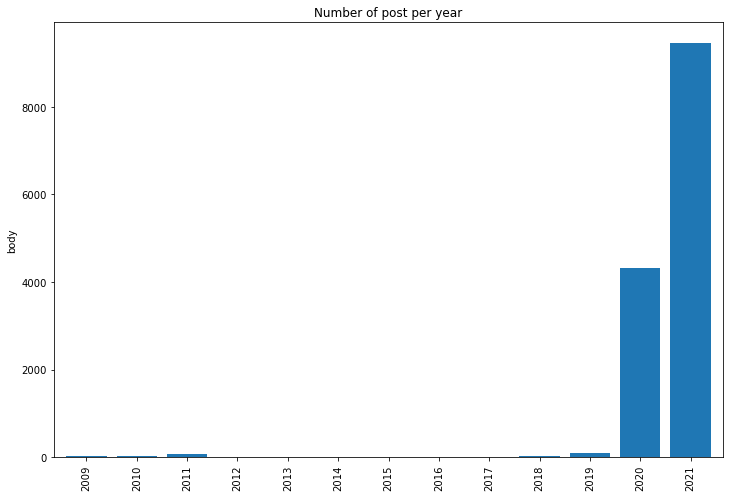

In [31]:
# Based on the year
plt.rcParams["figure.figsize"] = (12,8)
ax = df["Year"].groupby(df["Year"]).count().plot(kind="bar", width=0.8)
ax.set(xlabel="", ylabel="body", title="Number of post per year")
#plt.xticks(range(7), DayOfWeek)
plt.show()

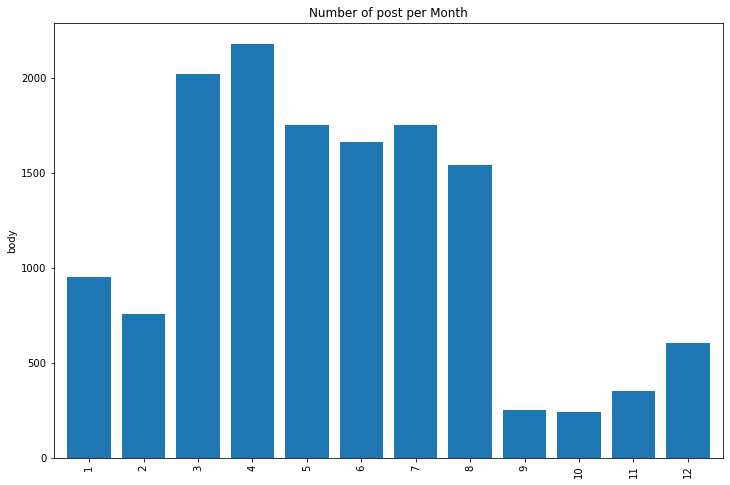

In [32]:
# Based on the Month
plt.rcParams["figure.figsize"] = (12,8)
ax = df["Month"].groupby(df["Month"]).count().plot(kind="bar", width=0.8)
ax.set(xlabel="", ylabel="body", title="Number of post per Month")
#plt.xticks(range(7), DayOfWeek)
plt.show()

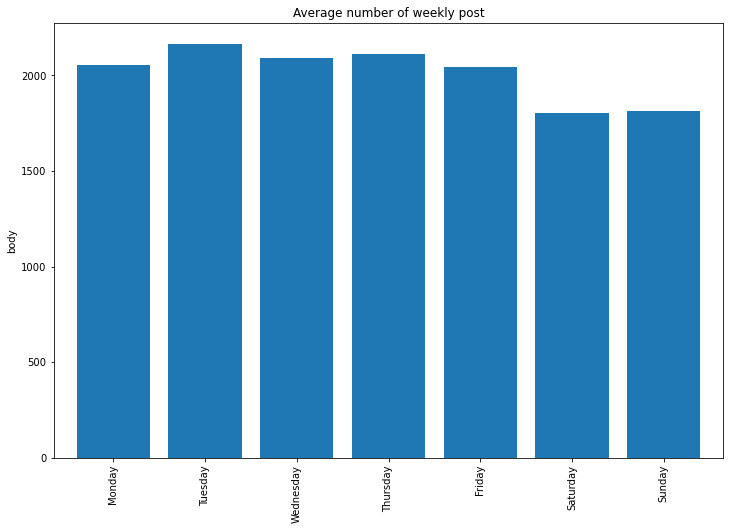

In [33]:
# Based on the day of the week
plt.rcParams["figure.figsize"] = (12,8)
ax = df["DayOfWeek"].groupby(df["DayOfWeek"]).count().plot(kind="bar", width=0.8)
ax.set(xlabel="", ylabel="body", title="Average number of weekly post")
plt.xticks(range(7), weekDays)
plt.show()

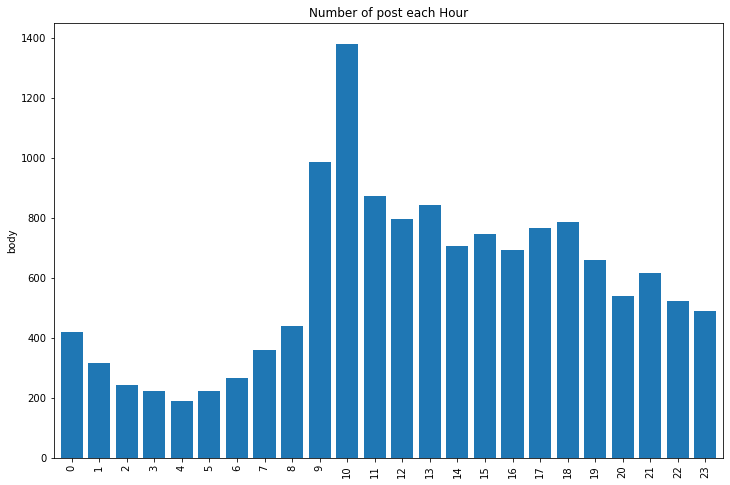

In [34]:
# Based on the time of the day
ax = df["HourofDay"].groupby(df["HourofDay"]).count().plot(kind="bar", width=0.8)
ax.set(xlabel="", ylabel="body", title="Number of post each Hour") # Default is UTC
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

Upvote range: 0 8575


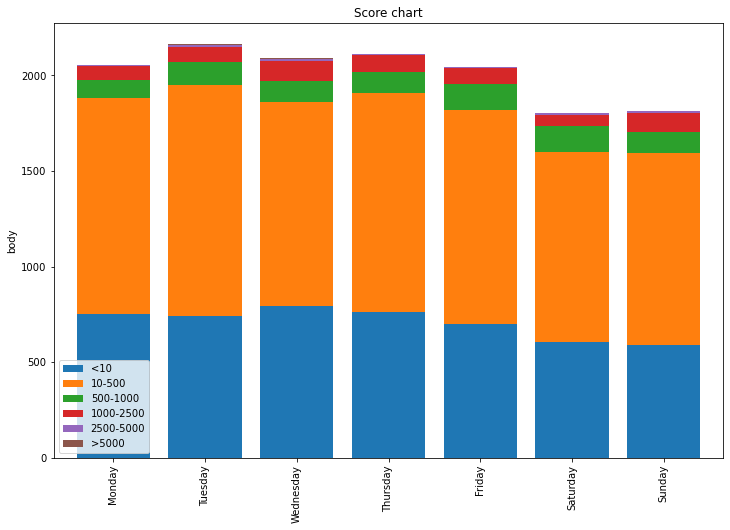

In [35]:
# Based on the day of the week, but segmented into upvote count groups
minscr = df["score"].min()
maxscr = df["score"].max()
print("Upvote range:", minscr, maxscr)

# Manually determine certain segmentation
dfseg = pd.DataFrame(index=range(7), columns=[])
dfseg["<10"] = df[df["score"]<=10]["DayOfWeek"].groupby(df["DayOfWeek"]).count()
dfseg["10-500"] = df[(df["score"]>10) & (df["score"]<=500)]["DayOfWeek"].groupby(df["DayOfWeek"]).count()
dfseg["500-1000"] = df[(df["score"]>500) & (df["score"]<=1000)]["DayOfWeek"].groupby(df["DayOfWeek"]).count()
dfseg["1000-2500"] = df[(df["score"]>1000) & (df["score"]<=2500)]["DayOfWeek"].groupby(df["DayOfWeek"]).count()
dfseg["2500-5000"] = df[(df["score"]>2500) & (df["score"]<=5000)]["DayOfWeek"].groupby(df["DayOfWeek"]).count()
dfseg[">5000"] = df[df["score"]>5000]["DayOfWeek"].groupby(df["DayOfWeek"]).count()

ax = dfseg.plot(kind="bar", stacked=True, width=0.8)
ax.set(xlabel="", ylabel="body", title="Score chart")
plt.xticks(range(7), weekDays)
plt.rcParams["figure.figsize"] = (12,8)
plt.show()

In [145]:
# Common post title words
freq = pd.Series(' '.join(df['body']).split()).value_counts()[:20]
freq

the     131008
and     107990
to      107716
*       100644
I        89576
of       88458
in       67479
a        66442
/        63348
-        55736
is       37622
my       36387
that     35062
for      33840
with     33470
have     32256
are      31178
last     29587
on       28180
was      26538
dtype: int64

In [146]:
# Uncommon post title words
freq =  pd.Series(' '.join(df['body']).split()).value_counts()[-20:]
freq

lower.)                                                                                                                                                                                      1
6:40                                                                                                                                                                                         1
STATEMENT                                                                                                                                                                                    1
(Seulement                                                                                                                                                                                   1
evolved,                                                                                                                                                                                     1
ivy,                                         